In [2]:
import re
import csv
import os

def parse_amc(amc_filename, csv_filename, method):
    """
    Parses an AMC file and logs lfemur X-axis rotation into a CSV file.

    :param amc_filename: Path to the AMC file.
    :param csv_filename: Path to the output CSV file.
    :param method: Label for the method (e.g., "Input Motion", "Linear Euler", "Bezier Euler").
    """
    data = []
    current_frame = None

    # Check if the CSV file exists and is empty
    file_is_empty = not os.path.exists(csv_filename) or os.stat(csv_filename).st_size == 0

    with open(amc_filename, "r") as file:
        for line in file:
            line = line.strip()

            # Detect frame number
            if line.isdigit():
                current_frame = int(line)

            # Extract lfemur rotation data
            elif line.startswith("lfemur") and current_frame is not None:
                values = list(map(float, re.findall(r"[-+]?\d*\.\d+|\d+", line)))

                if len(values) >= 1:  # Extract X-axis rotation (first value)
                    x_rotation = values[0]

                    # Log only frames between 600 and 800
                    if 600 <= current_frame <= 800:
                        data.append([current_frame, method, "lfemur", "X", x_rotation])

    # Write to CSV with proper headers if file is empty
    with open(csv_filename, "a", newline="") as csvfile:
        writer = csv.writer(csvfile)

        # Write headers if the file is empty
        if file_is_empty:
            writer.writerow(["Frame", "Method", "Joint", "Axis", "Angle"])

        # Append data
        writer.writerows(data)

    print(f"Logged {len(data)} frames from {amc_filename} ({method}) to {csv_filename}")

# Example Usage:
# parse_amc("131_04-dance.amc", "interpolation_data.csv", "Input Motion")
# parse_amc("131_04-dance-linearEuler.amc", "interpolation_data.csv", "Linear Euler")
# parse_amc("131_04-dance-bezierEuler.amc", "interpolation_data.csv", "Bezier Euler")

In [3]:
parse_amc("graph-dance-LE.amc", "graph1.csv", "Linear Euler")
parse_amc("graph-dance-BE.amc", "graph1.csv", "Bezier Euler")
parse_amc("131_04-dance.amc", "graph1.csv", "Input Motion")


Logged 201 frames from graph-dance-LE.amc (Linear Euler) to graph1.csv
Logged 201 frames from graph-dance-BE.amc (Bezier Euler) to graph1.csv
Logged 201 frames from 131_04-dance.amc (Input Motion) to graph1.csv


In [4]:

parse_amc("graph-dance-LQ.amc", "graph2.csv", "SLERP Quaternion")
parse_amc("graph-dance-BQ.amc", "graph2.csv", "Bezier SLERP Quaternion")
parse_amc("131_04-dance.amc", "graph2.csv", "Input Motion")

Logged 201 frames from graph-dance-LQ.amc (SLERP Quaternion) to graph2.csv
Logged 201 frames from graph-dance-BQ.amc (Bezier SLERP Quaternion) to graph2.csv
Logged 201 frames from 131_04-dance.amc (Input Motion) to graph2.csv


In [5]:
import re
import csv
import os

def parse_amc_for_graphs_3_4(amc_filename, csv_filename, method):
    """
    Parses an AMC file and logs root joint Z-axis rotation into a CSV file.

    :param amc_filename: Path to the AMC file.
    :param csv_filename: Path to the output CSV file.
    :param method: Label for the method (e.g., "Input Motion", "SLERP Quaternion", "Bezier SLERP Quaternion").
    """
    data = []
    current_frame = None

    # Check if the CSV file exists and is empty
    file_is_empty = not os.path.exists(csv_filename) or os.stat(csv_filename).st_size == 0

    with open(amc_filename, "r") as file:
        for line in file:
            line = line.strip()

            # Detect frame number
            if line.isdigit():
                current_frame = int(line)

            # Extract root joint rotation data
            elif line.startswith("root") and current_frame is not None:
                values = list(map(float, re.findall(r"[-+]?\d*\.\d+|\d+", line)))

                if len(values) >= 6:  # Ensure there are enough values (3 for position, 3 for rotation)
                    z_rotation = values[-1]  # Z rotation is the last value in the root line

                    # Log only frames between 200 and 500
                    if 200 <= current_frame <= 500:
                        data.append([current_frame, method, "root", "Z", z_rotation])

    # Write to CSV with proper headers if file is empty
    with open(csv_filename, "a", newline="") as csvfile:
        writer = csv.writer(csvfile)

        # Write headers if the file is empty
        if file_is_empty:
            writer.writerow(["Frame", "Method", "Joint", "Axis", "Angle"])

        # Append data
        writer.writerows(data)

    print(f"Logged {len(data)} frames from {amc_filename} ({method}) to {csv_filename}")

# Example Usage:
# parse_amc_for_graphs_3_4("131_04-dance.amc", "interpolation_data_graph3_4.csv", "Input Motion")
# parse_amc_for_graphs_3_4("131_04-dance-slerpQuaternion.amc", "interpolation_data_graph3_4.csv", "SLERP Quaternion")
# parse_amc_for_graphs_3_4("131_04-dance-bezierSlerpQuaternion.amc", "interpolation_data_graph3_4.csv", "Bezier SLERP Quaternion")

In [6]:
parse_amc_for_graphs_3_4("graph-dance-LQ.amc", "graph3.csv", "SLERP Quaternion")
parse_amc_for_graphs_3_4("graph-dance-LE.amc", "graph3.csv", "Linear Euler")
parse_amc_for_graphs_3_4("131_04-dance.amc", "graph3.csv", "Input Motion")

Logged 301 frames from graph-dance-LQ.amc (SLERP Quaternion) to graph3.csv
Logged 301 frames from graph-dance-LE.amc (Linear Euler) to graph3.csv
Logged 301 frames from 131_04-dance.amc (Input Motion) to graph3.csv


In [26]:

parse_amc_for_graphs_3_4("graph-dance-BE.amc", "graph4.csv", "Bezier Euler")
parse_amc_for_graphs_3_4("graph-dance-BQ.amc", "graph4.csv", "Bezier SLERP Quaternion")
parse_amc_for_graphs_3_4("131_04-dance.amc", "graph4.csv", "Input Motion")

Logged 301 frames from graph-dance-BE.amc (Bezier Euler) to graph4.csv
Logged 301 frames from graph-dance-BQ.amc (Bezier SLERP Quaternion) to graph4.csv
Logged 301 frames from 131_04-dance.amc (Input Motion) to graph4.csv


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_interpolations(csv_filename, title, y_label):
    """
    Plots all available interpolation methods from a given CSV file using solid pastel-colored lines.

    :param csv_filename: Path to the CSV file containing motion data.
    :param title: Title of the plot.
    :param y_label: Label for the Y-axis (e.g., "Angle (degrees)").
    """
    # Load the CSV file
    df = pd.read_csv(csv_filename)

    # Convert necessary columns to correct data types
    df["Frame"] = pd.to_numeric(df["Frame"])
    df["Angle"] = pd.to_numeric(df["Angle"])

    # Sort by frame number to ensure correct order
    df = df.sort_values(by="Frame")

    # Get unique methods in the dataset
    methods = df["Method"].unique()

    # Define pastel colors
    pastel_colors = [
        "Tomato", "Turquoise", "violet"
    ]

    # Plot each method with solid pastel lines
    plt.figure(figsize=(8, 5))
    for i, method in enumerate(methods):
        df_method = df[df["Method"] == method]
        plt.plot(df_method["Frame"], df_method["Angle"], label=method,
                 color=pastel_colors[i % len(pastel_colors)], linestyle='solid')

    # Set plot labels and title
    plt.xlabel("Frame Number")
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Example Usage:
# plot_interpolations("interpolation_data.csv", "Motion Interpolation Comparison", "Angle (degrees)")

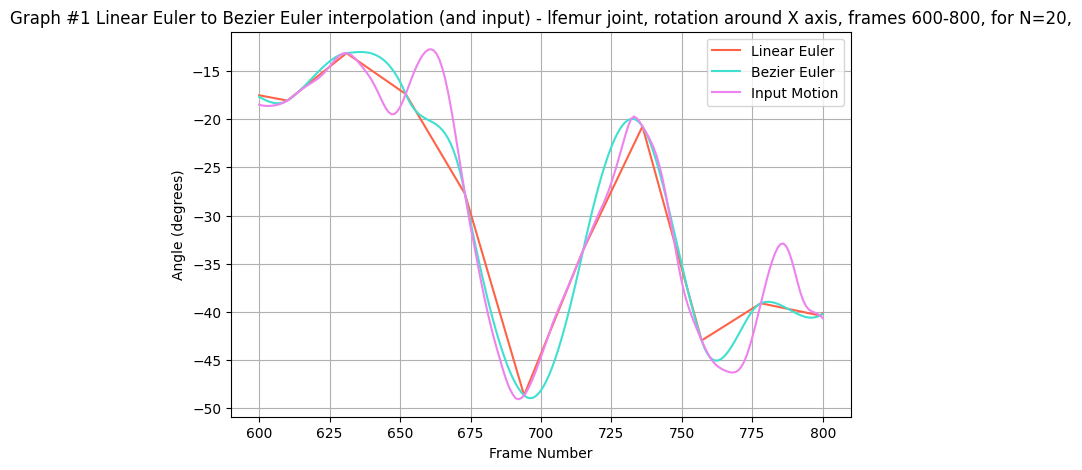

In [27]:
plot_interpolations("graph1.csv", "Graph #1 Linear Euler to Bezier Euler interpolation (and input) - lfemur joint, rotation around X axis, frames 600-800, for N=20,", "Angle (degrees)")

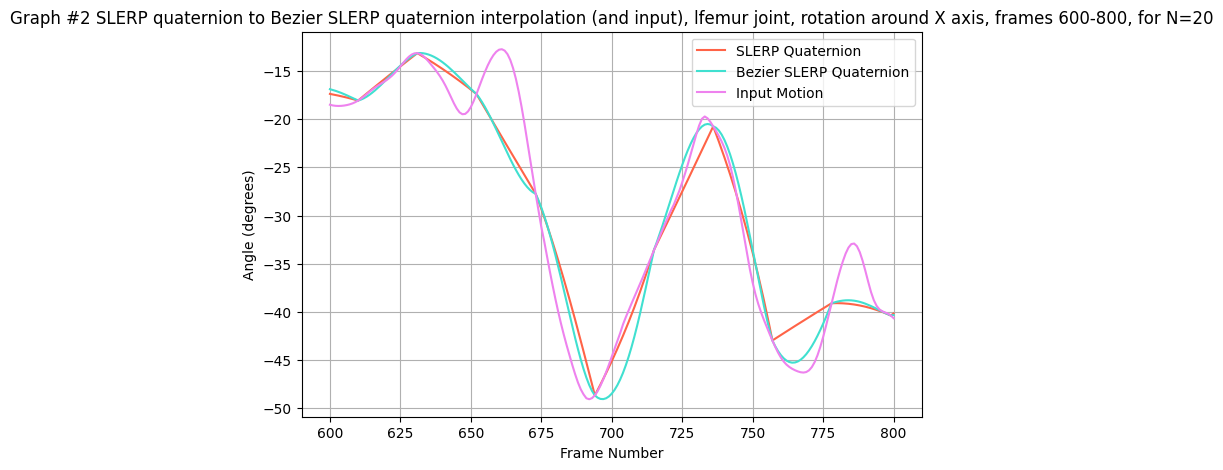

In [28]:
plot_interpolations("graph2.csv", "Graph #2 SLERP quaternion to Bezier SLERP quaternion interpolation (and input), lfemur joint, rotation around X axis, frames 600-800, for N=20", "Angle (degrees)")

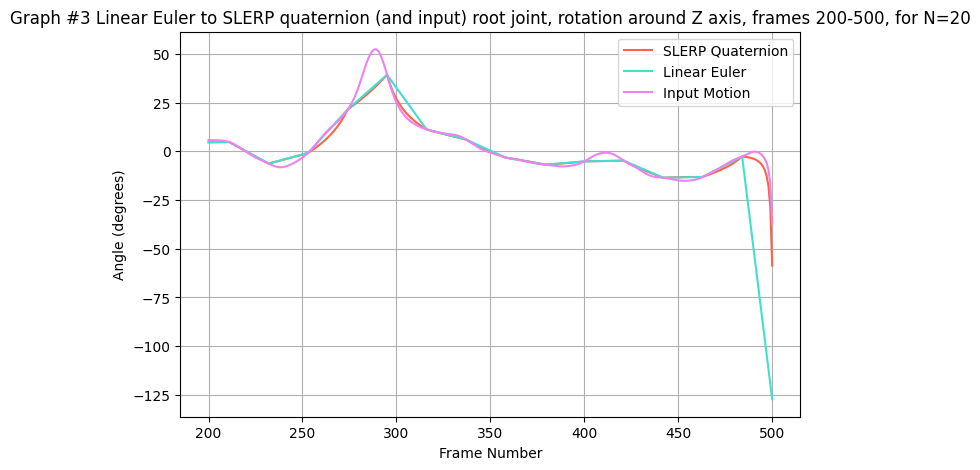

In [29]:
plot_interpolations("graph3.csv", "Graph #3 Linear Euler to SLERP quaternion (and input) root joint, rotation around Z axis, frames 200-500, for N=20", "Angle (degrees)")

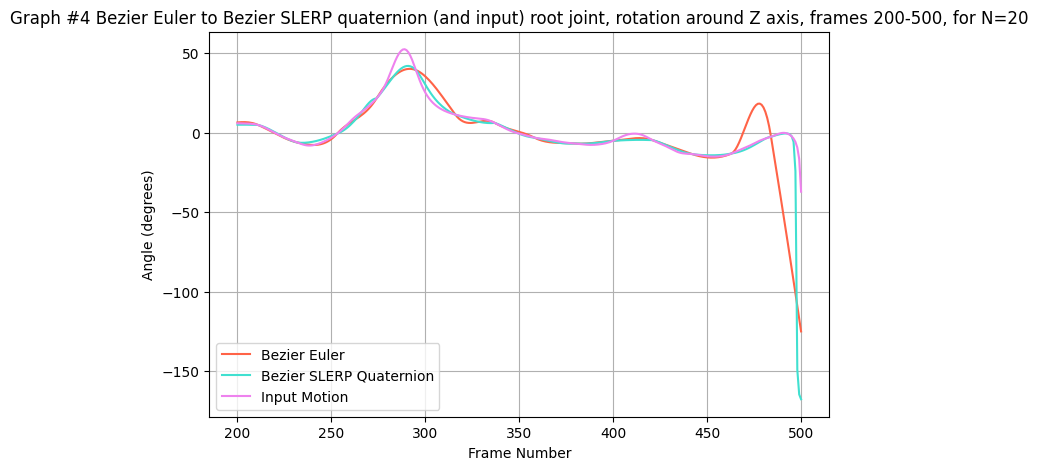

In [30]:
plot_interpolations("graph4.csv", "Graph #4 Bezier Euler to Bezier SLERP quaternion (and input) root joint, rotation around Z axis, frames 200-500, for N=20", "Angle (degrees)")